### Programming for Data Analysis

***

Problem: For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

For this assignment I have decided to investigate, and tabulate data related to Sugar-cane Disease.

***

#### Investigation
***

For this project I've imported and assessed a data set found online [1]. I've used the seaborn package from python to inspect the data and determine the correct distributions observed when collecting the relevant information.
In the data set marked out below labelled Canes, we have four variables that I will investigate, these are 'n', 'r', 'x' and 'block'.

N relates to the total number of shoots in each plot, R, the number of diseased shoots, X, the number of pieces of the stems, out of 50, planted in each plot and block, a factor for the blocks.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# start by importing all relevant packages for the project

In [2]:
Cane = pd.read_csv("cane.csv")
pd.set_option('display.max_columns', None) # [5]
Cane

# This is the sample data set that I shall use to mimic the data.

,n,r,x,block
0,87,76,19,A
1,119,8,14,A
2,94,74,9,A
3,95,11,12,A
4,134,0,12,A
...,...,...,...,...
175,61,2,8,D
176,154,12,35,D
177,98,0,8,D
178,129,9,14,D


In [3]:
Cane.describe()

# gives a description of the data set being investigated
# these figures will be used later to help generate my own data

,n,r,x
count,180.000000,180.000000,180.000000
mean,118.144444,20.255556,11.938889
std,44.425711,24.501082,6.451507
min,29.000000,0.000000,1.000000
25%,85.750000,3.000000,7.000000
50%,112.500000,11.500000,11.500000
75%,144.500000,25.250000,15.000000
max,243.000000,131.000000,36.000000


With the information above from the dataset it is now important we graph each variable to understand the distributions behind the data.

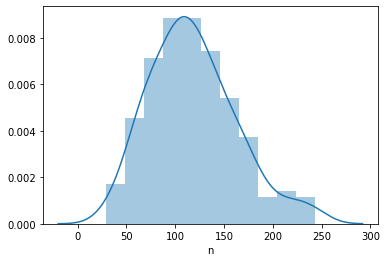

In [4]:
sns.distplot(Cane["n"], kde=True);

# plot of data variable 'n', this data is represented by a Binomial distribution
# I shall thus model my own 'N' data in a Binomial distribution [2]

We expect this to be binomial as it follows the real-world amount of shoots found per plot. Most plots have an number of shoots centred around the mean with some extremes of densely populated areas and areas with very few shoots.

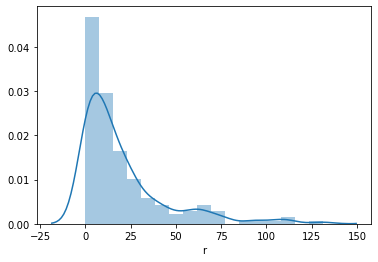

In [5]:
sns.distplot(Cane["r"], kde=True);

# plot of data variable 'r', this data is represented by an exponential distribution
# I will model my own 'R' data in a exponential distribution

R is the number of diseased roots and this as expected follows exponential distribution, with quite a few plots having small amounts of diseased roots with the amounts having greater amounts diminishing gradually to zero.

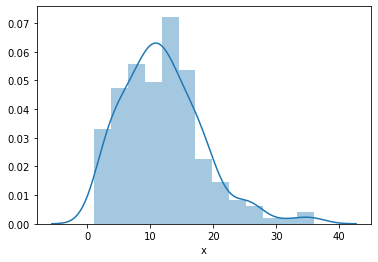

In [6]:
sns.distplot(Cane["x"], kde=True);

# plot of data variable 'x', this data is represented by either a Chi-Squared or Log Normal distribution
# I will model my own 'X' data on a Chi-Squared distribution

I decided to use the chi square distribution as the characteristic of chi square is that it determines whether the outcome was merely down to chance or was influenced. [3]

#### Generating the Dataset

***

To create the data set I will use the DataFrame feature of pandas. [4]

In [7]:
pd.set_option('display.max_rows', 180)

In [8]:
df = pd.DataFrame({'N' : np.random.normal(118, 44, 180),   
                        'R' : np.random.exponential(20, 180),
                        'X' : np.random.chisquare(12, 180),
                        'Block' : ['A', 'B', 'C', 'D'] * 45})

pd.set_option('display.max_columns', None)
display(df)

# N = create data with normal distribution with parameters generated from original dataset, such as mean and std
# R = create data using an exponential distribution with parameters found in Canes
# x = chi square data generated with above parameters
# block and naming of each variable
# pd set options display is to ensure we can see all data generated

,N,R,X,Block
0,155.882037,15.934751,13.512902,A
1,163.140483,2.774892,8.458198,B
2,29.223914,15.532850,11.134383,C
3,62.408262,22.966387,13.889514,D
4,101.591986,3.048370,13.127028,A
5,76.912528,8.488662,20.496730,B
6,109.479363,8.704862,27.913197,C
7,213.717759,13.256170,6.220281,D
8,77.571593,17.772994,20.866907,A
9,79.480487,35.476258,11.506437,B


#### Comparison of Initial Data and Generated Data

***

The next few graphs are visual representations that the randomly generated data is similarly distributed to the original data I sourced that helped me create my own data sets.

In [9]:
N = np.random.normal(118, 44, 180)

# normal distribution under the same parameters of above generrated data

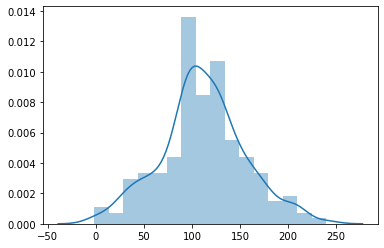

In [10]:
sns.distplot(N, kde=True);

# graph of N from user generated data

In [11]:
R = np.random.exponential(20, 180)

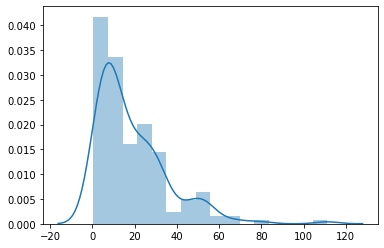

In [12]:
sns.distplot(R, kde=True);

In [13]:
X = np.random.chisquare(12, 180)

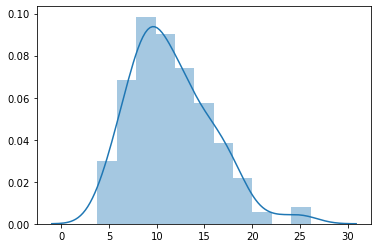

In [14]:
sns.distplot(X, kde=True);

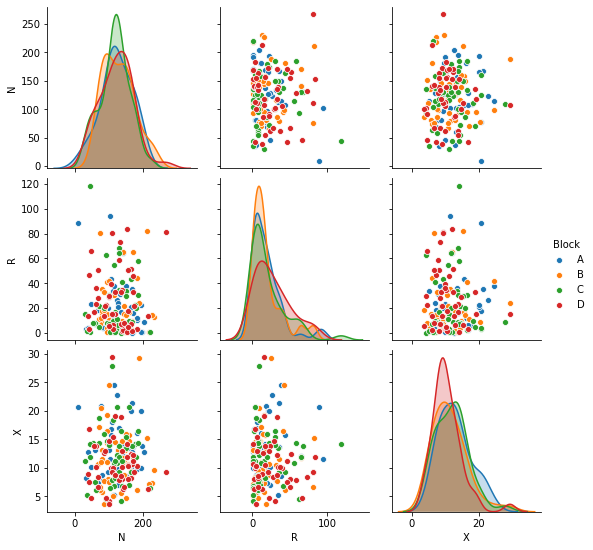

In [15]:
sns.pairplot(df, hue="Block");

# user generated data tabulated

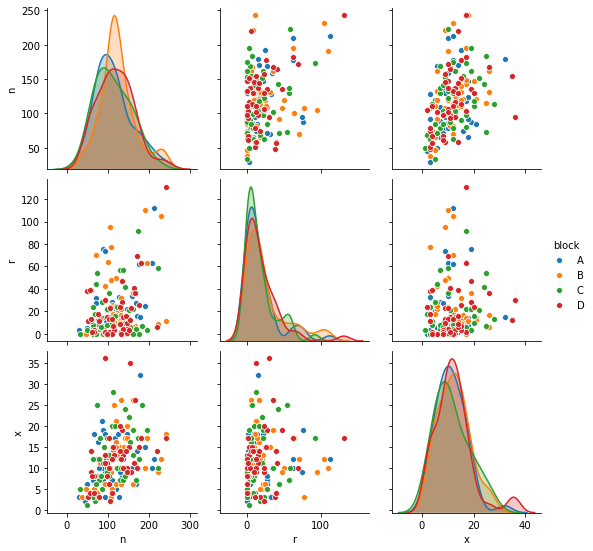

In [16]:
sns.pairplot(Cane, hue="block");

# tabulated data from original dataset

In [17]:
df.describe()

,N,R,X
count,180.000000,180.000000,180.000000
mean,123.038187,21.659741,11.797568
std,45.491658,22.663474,4.915063
min,8.498889,0.064676,3.596726
25%,94.573735,5.311358,8.228747
50%,123.686903,14.443886,11.102506
75%,155.729996,31.752682,14.287198
max,267.411423,118.616274,29.371626


In [18]:
Cane.describe()

,n,r,x
count,180.000000,180.000000,180.000000
mean,118.144444,20.255556,11.938889
std,44.425711,24.501082,6.451507
min,29.000000,0.000000,1.000000
25%,85.750000,3.000000,7.000000
50%,112.500000,11.500000,11.500000
75%,144.500000,25.250000,15.000000
max,243.000000,131.000000,36.000000


Thank you very much.

***

### References

***
[1] https://vincentarelbundock.github.io/Rdatasets/doc/boot/cane.html

[2] https://medium.com/mytake/understanding-different-types-of-distributions-you-will-encounter-as-a-data-scientist-27ea4c375eec

[3] https://www.ling.upenn.edu/~clight/chisquared.htm#:~:text=The%20Chi%2Dsquare%20test%20is,if%20the%20variables%20are%20independent.

[4] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

[5] https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows